In [36]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms.ThompsonSampling.Non_Stationary_Environment import *
from algorithms.ThompsonSampling.TS_Learner import *
from algorithms.ThompsonSampling.SWTS_Learner import *

In [37]:
n_arms = 3
price = np.array([300, 325, 350, 375, 400, 425, 450, 475])
price = np.array(list(range(300,500,2))) #incremento di 5 in 5
n_arms = np.size(price)
p1 = [[0.045, 0.04, 0.0325, 0.0275, 0.0250, 0.02, 0.0175, 0.0125],
              [0.045, 0.04, 0.0325, 0.0275, 0.0250, 0.02, 0.0175, 0.0125],
              [0.035, 0.03, 0.0225, 0.0175, 0.015, 0.01, 0.0075, 0.0025],
              [0.037, 0.032, 0.0245, 0.0195, 0.0170, 0.0120, 0.0095, 0.0045]]
p = []
for i in range(0,4):
    p.append(np.random.normal(0.03,0.01,size=100)) #ho fatto per ora una gaussiana 


p = np.array(p)  
#print(p)
    
    

T = 365

n_experiments = 1000
ts_rewards_per_experiment = []
swts_rewards_per_experiment = []
window_size = int(np.sqrt(T))


In [38]:
for e in range(0, n_experiments):
    ts_env = Non_Stationary_Environment(n_arms=n_arms, probabilities=p, horizon=T, price=price)
    ts_learner = TS_Learner(n_arms=n_arms)

    swts_env = Non_Stationary_Environment(n_arms=n_arms, probabilities=p, horizon=T, price=price)
    swts_learner = SWTS_Learner(n_arms=n_arms, window_size=window_size)

    for t in range(0, T):
        pulled_arm = ts_learner.pull_arm()
        reward = ts_env.round(pulled_arm)
        reward_price = ts_env.round_price(pulled_arm)
        ts_learner.update(pulled_arm, reward)

        pulled_arm = swts_learner.pull_arm()
        reward = swts_env.round(pulled_arm)
        swts_learner.update(pulled_arm, reward)

    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    swts_rewards_per_experiment.append(swts_learner.collected_rewards)

In [39]:
ts_instantaneous_regret = np.zeros(T)
swts_instantaneous_regret = np.zeros(T)
n_phases = len(p)
phases_len = T/n_phases
opt_per_phases = p.max(axis=1)
optimum_per_round = np.zeros(T)

for i in range(0, n_phases):
    optimum_per_round[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i]
    ts_instantaneous_regret[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i] - np.mean(ts_rewards_per_experiment, axis=0)[int(i*phases_len)]
    swts_instantaneous_regret[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i] - np.mean(swts_rewards_per_experiment, axis=0)[int(i*phases_len)]

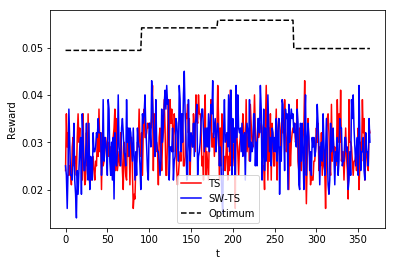

In [40]:
plt.figure(0)
plt.ylabel("Reward")
plt.xlabel("t")
plt.plot(np.mean(ts_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(swts_rewards_per_experiment, axis=0), 'b')
plt.plot(optimum_per_round, '--k')
plt.legend(["TS", "SW-TS", "Optimum"])

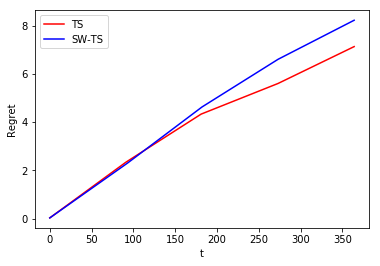

In [41]:
plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(ts_instantaneous_regret), 'r')
plt.plot(np.cumsum(swts_instantaneous_regret), 'b')
plt.legend(["TS", "SW-TS"])